# IMPORT Library/Module

In [1]:
#import module
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from Cleansing import cleansing
from wordcloud import WordCloud

# Drop Duplicate and Null Data

In [2]:
#Read the csv to dataframe
data = pd.read_csv('Dataset/data.csv', encoding= 'latin-1')

Check Table size of data

In [3]:
#check table size
data.shape

(13169, 13)

In [4]:
#View Information about data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          13169 non-null  object
 1   HS             13169 non-null  int64 
 2   Abusive        13169 non-null  int64 
 3   HS_Individual  13169 non-null  int64 
 4   HS_Group       13169 non-null  int64 
 5   HS_Religion    13169 non-null  int64 
 6   HS_Race        13169 non-null  int64 
 7   HS_Physical    13169 non-null  int64 
 8   HS_Gender      13169 non-null  int64 
 9   HS_Other       13169 non-null  int64 
 10  HS_Weak        13169 non-null  int64 
 11  HS_Moderate    13169 non-null  int64 
 12  HS_Strong      13169 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.3+ MB


Let's remove data duplicate on data

In [5]:
#Check total data duplicates
data.duplicated().sum()

125

In [6]:
#assign new dataframe with delete duplicate data
data_dup = data.drop_duplicates()
data_dup.shape

(13044, 13)

Let's remove null valun on data_dup

In [7]:
#check missing value
data_dup.isna().sum()

Tweet            0
HS               0
Abusive          0
HS_Individual    0
HS_Group         0
HS_Religion      0
HS_Race          0
HS_Physical      0
HS_Gender        0
HS_Other         0
HS_Weak          0
HS_Moderate      0
HS_Strong        0
dtype: int64

# Clensing Data

Clean data_dup with function from Cleansing.py

In [8]:
#Create Colom with data clean
data_dup['Tweet_Clean'] = data_dup.Tweet.apply(cleansing)
data_dup.tail(5)

C:\Users\BAV USER\AppData\Local\Temp\ipykernel_11192\248085365.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_dup['Tweet_Clean'] = data_dup.Tweet.apply(cleansing)


,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Tweet_Clean
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0,jangan asal berbicara ndasmu kamu yang sekata ...
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0,kasur mana enak
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0,hati hati tidak lagi bosan duh
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0,bom yang real mudah terdeteksi bom yang terkub...
13168,"USER Mana situ ngasih("": itu cuma foto ya kuti...",1,1,1,0,0,0,0,0,1,1,0,0,mana situ memberi itu cuma foto ya kutil


Create and Remove stopword on data_dup

In [9]:
#Function Remove stop word
def remove_stopword(text):
    df_stopwords = pd.read_csv('Dataset/stopword.csv',names=['text'])
    list_stopwords = df_stopwords['text'].to_list()
    text = text.split(" ") 
    text = [i for i in text if i not in list_stopwords] 
    text = ' '.join(text) 
    return text

In [20]:
#Remove stopward on Tweet_Clean and assign on new colom New_Tw
data_dup['New_Tw'] = data_dup.Tweet_Clean.apply(remove_stopword)
data_dup.head(10)

C:\Users\BAV USER\AppData\Local\Temp\ipykernel_11192\1489806937.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_dup['New_Tw'] = data_dup.Tweet_Clean.apply(remove_stopword)


,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Tweet_Clean,New_Tw
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,di saat semua cowok berusaha melacak perhatian...,cowok berusaha melacak perhatian lantas remehk...
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,siapa yang telat memberi tau kamu gue bergaul ...,telat tau bergaul cigax jifla calis licew
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,41 kadang aku berpikir kenapa aku tetap percay...,41 kadang berpikir percaya tuhan jatuh berkali...
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,aku itu aku ku tau matamu tapi dilihat dari ma...,ku tau matamu
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,kaum sudah kelihatan dongoknya dari awal tamba...,kaum dongoknya haha
5,USER Ya bani taplak dkk \xf0\x9f\x98\x84\xf0\x...,1,1,0,1,0,0,0,0,1,0,1,0,ya dan kawan kawan,kawan kawan
6,deklarasi pilkada 2018 aman dan anti hoax warg...,0,0,0,0,0,0,0,0,0,0,0,0,deklarasi pilihan kepala daerah 2018 aman dan ...,deklarasi pilihan kepala daerah 2018 aman anti...
7,Gue baru aja kelar re-watch Aldnoah Zero!!! pa...,0,1,0,0,0,0,0,0,0,0,0,0,gue baru saja selesai re watch aldnoah zero pa...,selesai re watch aldnoah zero 2 karakter utama...
8,Nah admin belanja satu lagi port terbaik nak m...,0,0,0,0,0,0,0,0,0,0,0,0,nah admin belanja satu lagi po terbaik nak mak...,admin belanja po terbaik nak makan ais kepal m...
9,USER Enak lg klo smbil ngewe',0,1,0,0,0,0,0,0,0,0,0,0,enak lagi kalau sambil,enak


# Analyze the data_dup

In [22]:
#View Information about data type
data_dup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13044 entries, 0 to 13168
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          13044 non-null  object
 1   HS             13044 non-null  int64 
 2   Abusive        13044 non-null  int64 
 3   HS_Individual  13044 non-null  int64 
 4   HS_Group       13044 non-null  int64 
 5   HS_Religion    13044 non-null  int64 
 6   HS_Race        13044 non-null  int64 
 7   HS_Physical    13044 non-null  int64 
 8   HS_Gender      13044 non-null  int64 
 9   HS_Other       13044 non-null  int64 
 10  HS_Weak        13044 non-null  int64 
 11  HS_Moderate    13044 non-null  int64 
 12  HS_Strong      13044 non-null  int64 
 13  Tweet_Clean    13044 non-null  object
 14  New_Tw         13044 non-null  object
dtypes: int64(12), object(3)
memory usage: 1.6+ MB


**Some insights about the data_dup**
> Total Number of **Rows** in the data_dup = **13044**

> Total Number of **Columns** in the data_dup = **15**

> It seems that there no missing values

In [12]:
#view some basic descriptive details
data_dup.describe()

,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
count,13044.000000,13044.000000,13044.000000,13044.000000,13044.000000,13044.000000,13044.000000,13044.000000,13044.000000,13044.000000,13044.000000,13044.000000
mean,0.423030,0.383701,0.271389,0.151641,0.060488,0.043162,0.024686,0.023306,0.284115,0.256670,0.130175,0.036185
std,0.494059,0.486305,0.444693,0.358686,0.238397,0.203229,0.155171,0.150879,0.451009,0.436812,0.336509,0.186758
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Bivariate Analysis**

In [13]:
#check the linieritas of data
linier = data_dup.corr()
linier

C:\Users\BAV USER\AppData\Local\Temp\ipykernel_11192\688249759.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  linier = data_dup.corr()


,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
HS,1.000000,0.365292,0.712754,0.493752,0.296328,0.248039,0.185798,0.180403,0.735728,0.686258,0.451792,0.226287
Abusive,0.365292,1.000000,0.286353,0.148142,0.069610,-0.028722,0.196547,0.187413,0.261476,0.310169,0.188095,-0.098015
HS_Individual,0.712754,0.286353,1.000000,-0.258028,0.033899,-0.000672,0.214011,0.183402,0.636195,0.962826,-0.236100,0.058995
HS_Group,0.493752,0.148142,-0.258028,1.000000,0.366139,0.342486,-0.009406,0.021111,0.224657,-0.248436,0.915018,0.238550
HS_Religion,0.296328,0.069610,0.033899,0.366139,1.000000,0.094862,-0.003061,0.024751,-0.159848,0.033490,0.345290,0.083432
HS_Race,0.248039,-0.028722,-0.000672,0.342486,0.094862,1.000000,-0.028927,-0.020306,-0.133800,-0.007345,0.238469,0.243672
HS_Physical,0.185798,0.196547,0.214011,-0.009406,-0.003061,-0.028927,1.000000,0.054019,-0.100225,0.220971,0.000123,-0.025535
HS_Gender,0.180403,0.187413,0.183402,0.021111,0.024751,-0.020306,0.054019,1.000000,-0.097315,0.190753,0.027826,-0.019047
HS_Other,0.735728,0.261476,0.636195,0.224657,-0.159848,-0.133800,-0.100225,-0.097315,1.000000,0.605078,0.225597,0.124610
HS_Weak,0.686258,0.310169,0.962826,-0.248436,0.033490,-0.007345,0.220971,0.190753,0.605078,1.000000,-0.227323,-0.113858


<AxesSubplot: >

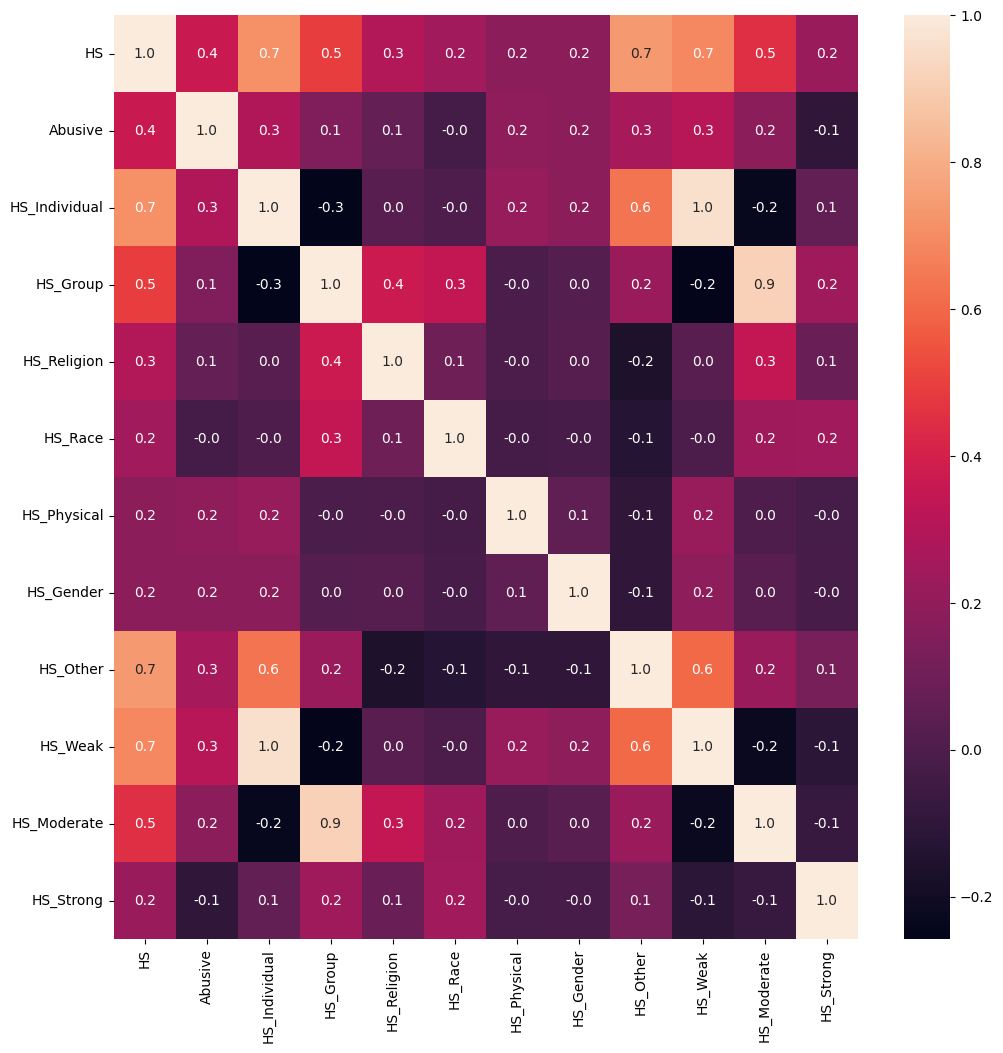

In [14]:
#Heatmap
plt.figure(figsize=(12,12))
sns.heatmap(linier, annot=True, fmt='.1f')

**Univariate Analysis**

<AxesSubplot: xlabel='Abusive', ylabel='count'>

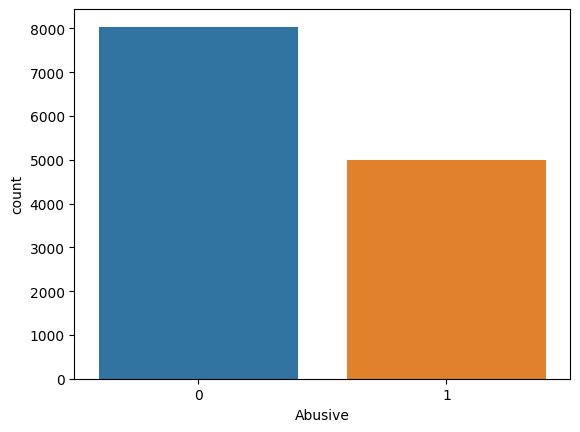

In [32]:
#Abusive with Non Abusive
sns.countplot(x=data_dup["Abusive"])


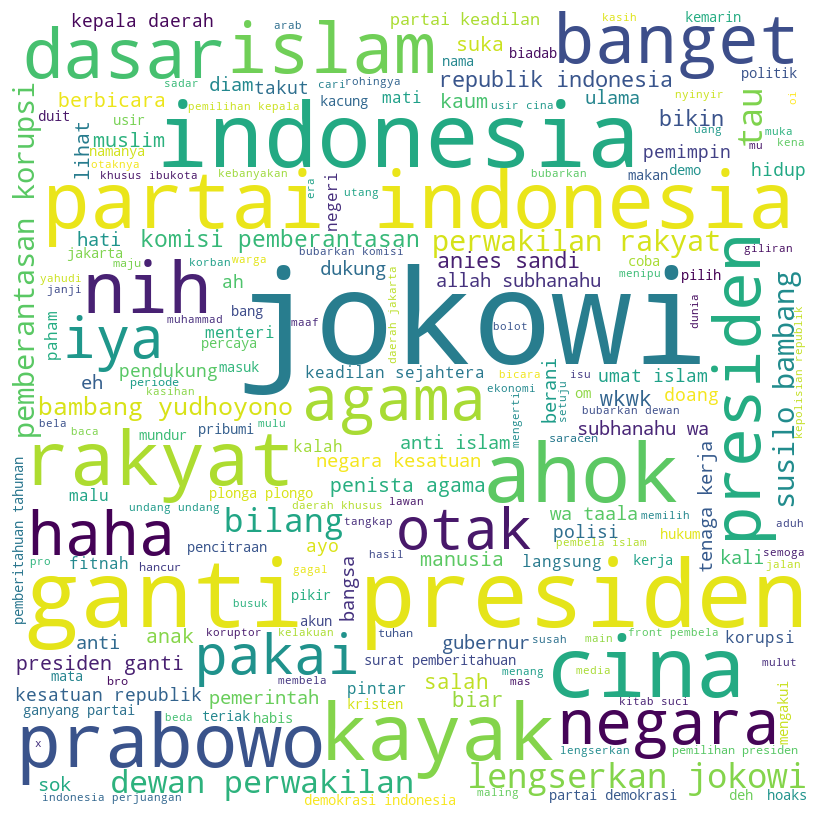

In [16]:
#Word HS
HS = data_dup.loc[data_dup.HS == 1]
text = ' '.join(HS['New_Tw'])

wc = WordCloud(width = 800, height = 800, background_color= 'White',
                min_font_size = 10).generate(text)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

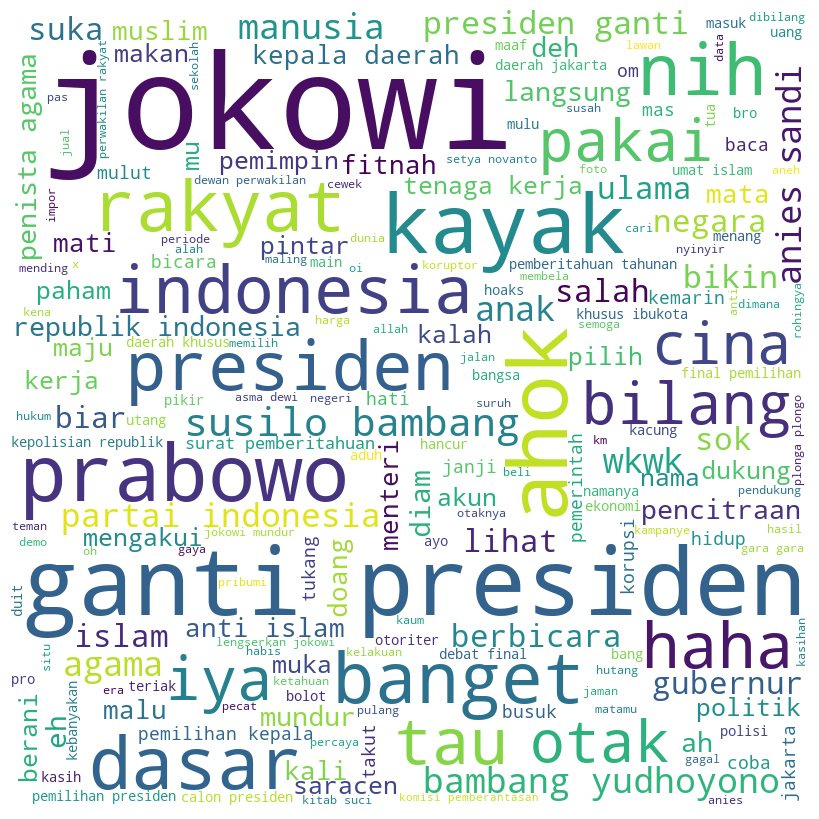

In [17]:
#Word HS Weak
HS_Weak = data_dup.loc[data_dup.HS_Weak == 1]
text = ' '.join(HS_Weak['New_Tw'])

wc = WordCloud(width = 800, height = 800, background_color= 'White',
                min_font_size = 10).generate(text)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

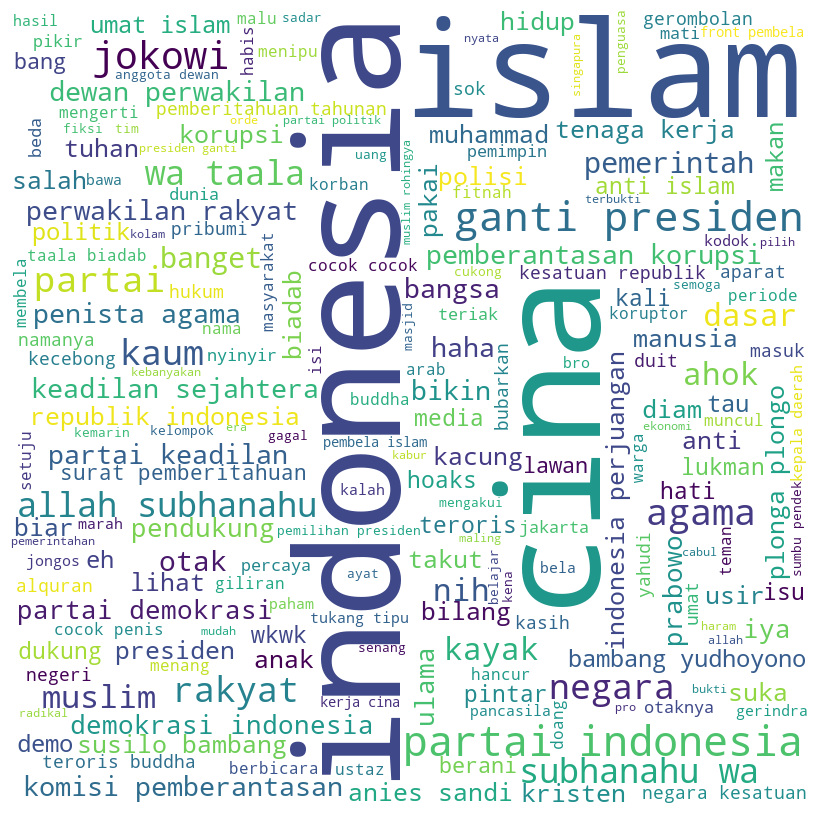

In [18]:
#Word HS_Moderate
HS_Moderate = data_dup.loc[data_dup.HS_Moderate == 1]
text = ' '.join(HS_Moderate['New_Tw'])

wc = WordCloud(width = 800, height = 800, background_color= 'White',
                min_font_size = 10).generate(text)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

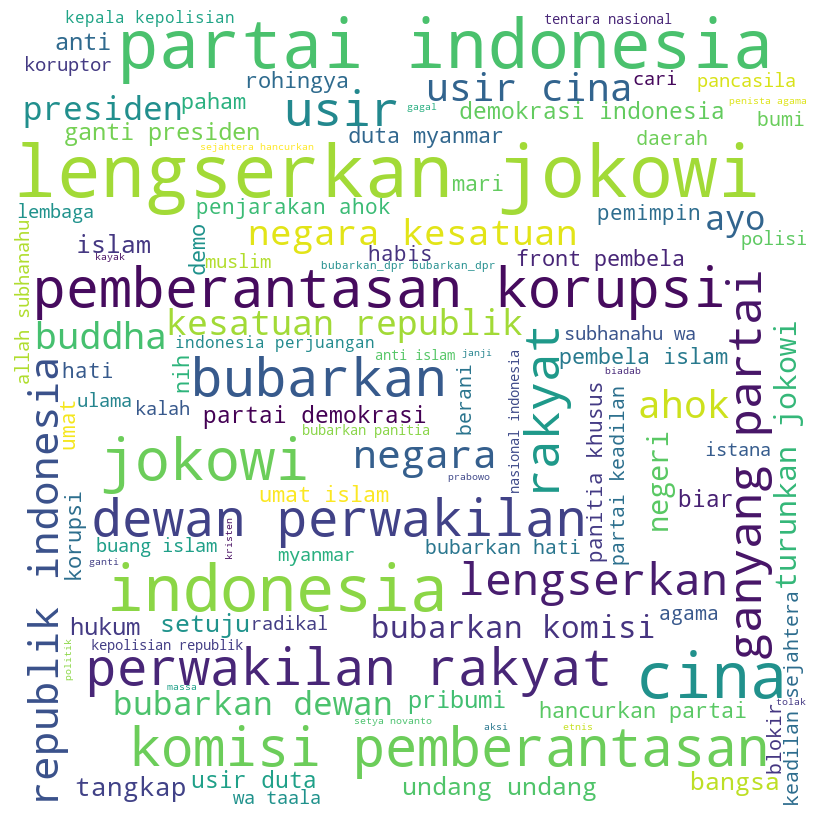

In [19]:
#Word HS_Strong
HS_Strong = data_dup.loc[data_dup.HS_Strong == 1]
text = ' '.join(HS_Strong['New_Tw'])

wc = WordCloud(width = 800, height = 800, background_color= 'White',
                min_font_size = 10).generate(text)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()